# Importing Libraries for both packages

In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pca import pca

# Processing the Data

In [258]:
# Importing Dataset
df1 = pd.read_csv('Pizza.csv')
df1

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [6]:
# Checking the Types of our Data
df1.dtypes

brand      object
id          int64
mois      float64
prot      float64
fat       float64
ash       float64
sodium    float64
carb      float64
cal       float64
dtype: object

In [267]:
# Preprocessing - Removing Brands and ID
df1_label = df1[['brand','id']].copy()
df2 = df1.drop(columns=['brand','id']).copy()
number_of_components = df2.shape[1] # Number of Components = 7
df2.describe()

,mois,prot,fat,ash,sodium,carb,cal
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,40.903067,13.373567,20.229533,2.633233,0.669400,22.864767,3.271000
std,9.552987,6.434392,8.975658,1.269724,0.370358,18.029722,0.620034
min,25.000000,6.980000,4.380000,1.170000,0.250000,0.510000,2.180000
25%,30.902500,8.060000,14.770000,1.450000,0.450000,3.467500,2.910000
50%,43.300000,10.440000,17.135000,2.225000,0.490000,23.245000,3.215000
75%,49.115000,20.022500,21.435000,3.592500,0.702500,41.337500,3.520000
max,57.220000,28.480000,47.200000,5.430000,1.790000,48.640000,5.080000


In [277]:
df2.columns

Index(['mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal'], dtype='object')

# Apply PCA using sklearn package

In [156]:
# Normalization
sc = StandardScaler()
sc.fit(df2.values)
scaled = sc.transform(df2.values)

In [278]:
# Applying the PCA and getting the variance ratio

sklearn_pca = PCA(n_components = number_of_components).fit(df2.values)
sklearn_transform = sklearn_pca.fit_transform(scaled)
variance_exp = sklearn_pca.explained_variance_ratio_

# Get the names of EACH principal components
sklearn_pca = PCA(n_components = number_of_components).fit(df2.values)
most_important_features = [np.abs(sklearn_pca.components_[i]).argmax() for i in range(number_of_components)]
initial_feature_names = df2.columns
most_important_names = [initial_feature_names[most_important_features[i]] for i in range(number_of_components)]

In [279]:
# Explaining the Variance Ratios for each Principal Component
num = 1
for i in range(len(variance_exp)):
    print(f"PC{num} ({most_important_names[i]}) explains {round(variance_exp[i]*100,3)}% of the Variance.")
    num += 1

PC1 (carb) explains 59.597% of the Variance.
PC2 (mois) explains 32.721% of the Variance.
PC3 (prot) explains 5.922% of the Variance.
PC4 (ash) explains 1.36% of the Variance.
PC5 (sodium) explains 0.395% of the Variance.
PC6 (ash) explains 0.005% of the Variance.
PC7 (cal) explains 0.0% of the Variance.


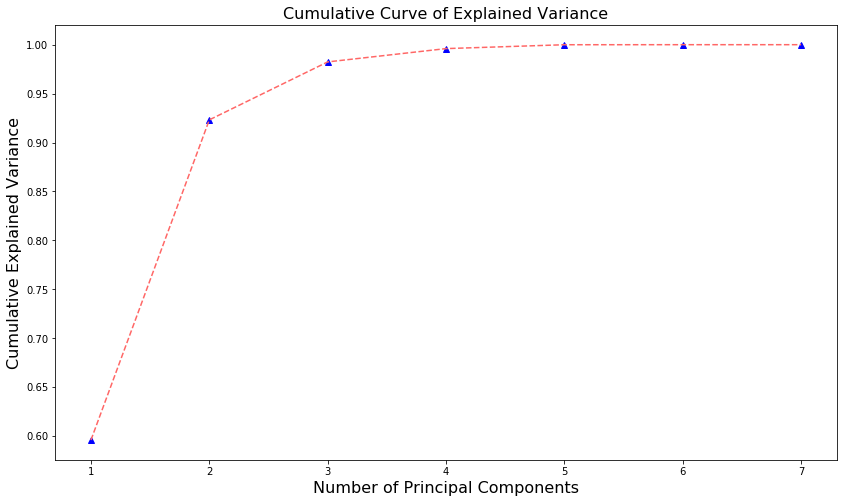

In [280]:
# Plotting the Cumulative Curve of Explained Variance

cum_var_exp = np.cumsum(variance_exp)
plt.figure(figsize = (14, 8))
nc = np.arange(1, variance_exp.shape[0] + 1)
plt.plot(nc, cum_var_exp, 'b^')
plt.plot(nc, cum_var_exp, '--r', color='#FF6766')
plt.xlabel('Number of Principal Components', fontsize=16)
plt.ylabel('Cumulative Explained Variance', fontsize=16)
plt.title('Cumulative Curve of Explained Variance', fontsize=16)
plt.show()

# Applying PCA using pca package

In [281]:
df2

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [282]:
# Importing pca package
from pca import pca

# Initialize to reduce the data up to the number of components that explains x% of the variance.
model = pca(n_components = 0.95) # In this case I look at 95% of the variance. 

# Instead of explaining x% of the variance, you can Reduce the data towards x number of PCs
# model = pca(n_components = 2) 

# Fit Transform
results = model.fit_transform(df2)

# Print the top features. The results show that f1 is best, followed by f2 etc
print(results['topfeat'])

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
    PC feature   loading  type
0  PC1    carb  0.878084  best
1  PC2    mois -0.747074  best
2  PC1    prot -0.266941  weak
3  PC2     fat  0.657845  weak
4  PC1     ash -0.055434  weak
5  PC2  sodium  0.023814  weak
6  PC2     cal  0.061254  weak


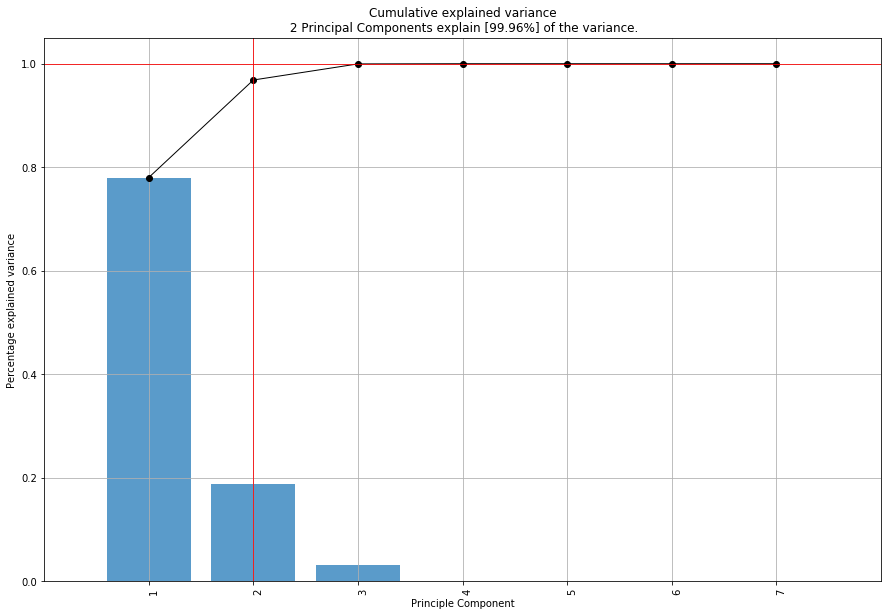

<Figure size 432x288 with 0 Axes>

In [283]:
# Make plot
fig, ax = model.plot()

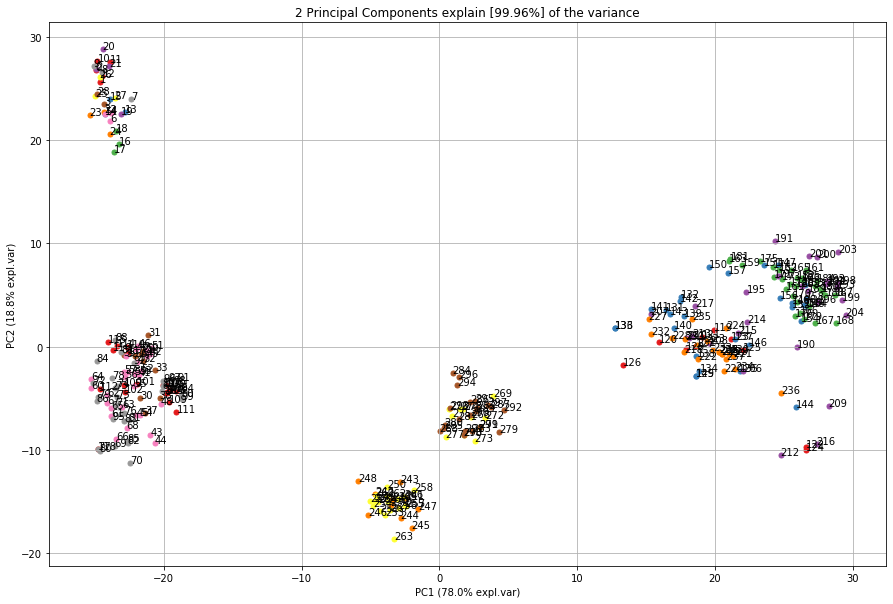

In [284]:
# Make Scatter Plot
fig, ax = model.scatter()
ax.legend().set_visible(False) # Remove Legend

[pca] >Plot PC1 vs PC2 with loadings.


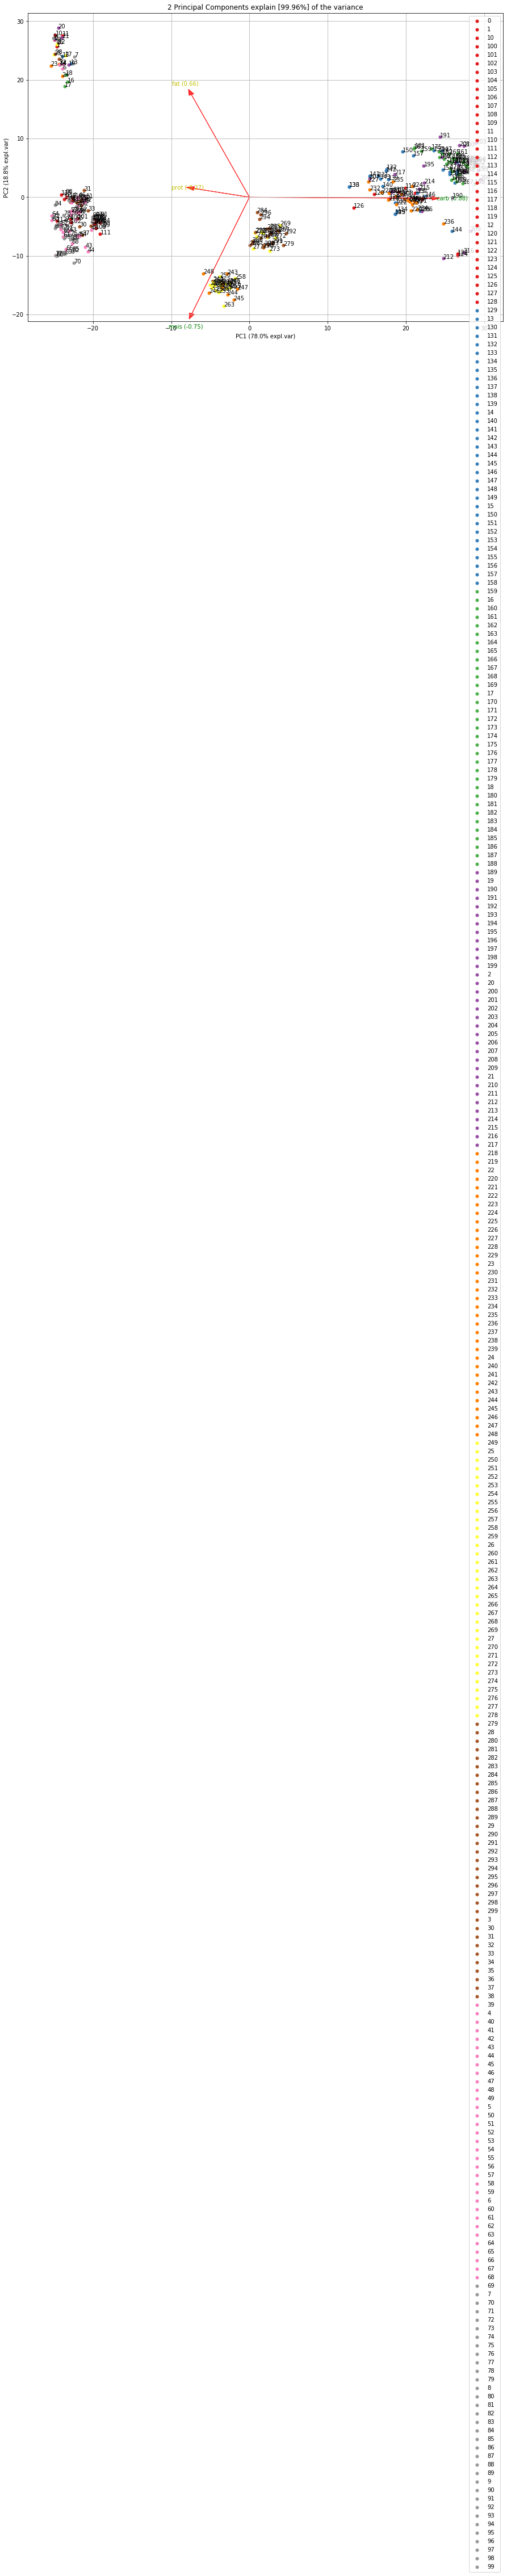

In [285]:
# Make biplot
fig, ax = model.biplot(n_feat=4, PC=[0,1])